# Declaration of Originality

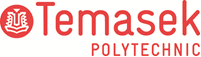

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  :  Mikeal Leow (2400024B)
* Tutorial Group                :  P06
* Tutor						    :  Emile SABASTIAN
* Submission Date               :  14 February 2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [57]:
## Import libraries
import pandas as pd

# 1. Business Understanding
Goal: Missed hospital appointments lead to wasted medical resources, longer patient waiting times, and increased operational costs.  
The goal of this project is to develop a supervised machine learning model that predicts whether a patient is likely to **not show up** for a scheduled hospital appointment.

By identifying high-risk no-show appointments in advance, hospitals can:
- Send targeted reminders
- Adjust scheduling or overbooking strategies
- Improve resource utilisation and patient care efficiency

# 2. Data Understanding

## 2.1 Load dataset

In [58]:
## Read *.csv file into pandas DataFrame
df = pd.read_csv("../data/hospital_no_show_appointments.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## 2.2 Summary Statistics

To better understand the dataset structure, the data types of each variable were examined.
This helps identify numerical, categorical, and date-related features and guides subsequent preprocessing steps.

Key observations:

The dataset contains a mix of numerical, categorical, and date-related variables.

Age is a numerical variable representing patient age.

Medical condition indicators such as hypertension, diabetes, alcoholism, scholarship, and SMS_received are binary numerical variables (0 or 1).

Gender, neighbourhood, and appointment attendance (No-show) are categorical variables.

ScheduledDay and AppointmentDay are stored as object types and will be converted to datetime format during preprocessing.

No missing values were detected across all variables.

In [59]:
## Understand the type of variable for each column
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [60]:
## Check for missing data
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [61]:
# Standardise column names
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace('-', '_')
    .str.replace(' ', '_')
)

df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show'],
      dtype='object')

### Describe Data Distribution

To gain an overall understanding of the dataset, descriptive statistics were generated for numerical variables.  
This provides insights into the central tendency, spread, and potential anomalies such as unusually high or low values.


In [62]:
## Describe data distribution
df.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Observation on Descriptive Statistics

The descriptive statistics output includes `patientid` and `appointmentid`, which are identifier columns.
These columns do not represent meaningful numerical features and may distort statistical interpretation.

Therefore, they will be excluded from subsequent descriptive analysis and modelling steps.


In [63]:
## Describe data distribution (excluding identifier columns)
df.drop(columns=['patientid', 'appointmentid']).describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Observation: Invalid Age Values

From the descriptive statistics above, the minimum value for **age** is **-1**, which is not a valid age.

This indicates the presence of invalid or placeholder values in the dataset. Such values can negatively impact data analysis and model performance if left untreated.


In [64]:
# Check number of invalid age values
df[df['age'] < 0].shape[0]

# View sample rows with invalid age
df[df['age'] < 0].head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


### Handling Invalid Age Values

Negative age values are not meaningful in a real-world medical context and likely represent data entry errors or placeholders.

As the number of such records is relatively small compared to the overall dataset size, these rows will be **removed** to preserve data quality and avoid introducing bias through imputation.


In [65]:
# Remove records with invalid age values
df = df[df['age'] >= 0]

# Verify that invalid age values are removed
df['age'].min()

0

In [66]:
# Re-describe data distribution (excluding identifier columns)
df.drop(columns=['patientid', 'appointmentid']).describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data
The target variable no_show indicates whether a patient failed to attend a scheduled hospital appointment.

Understanding the distribution of the target variable is important to identify potential class imbalance, which can influence model performance and metric selection.

A visual inspection of the class distribution helps determine whether special techniques such as resampling or alternative evaluation metrics are required.

### 2.3.1.1 Understanding distribution of target

In [67]:
## Distribution of target variable (no_show)
df['no_show'].value_counts()


no_show
No     88207
Yes    22319
Name: count, dtype: int64

### 2.3.1.2 Understanding distribution of features

In [68]:
# Distribution of age
df['age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

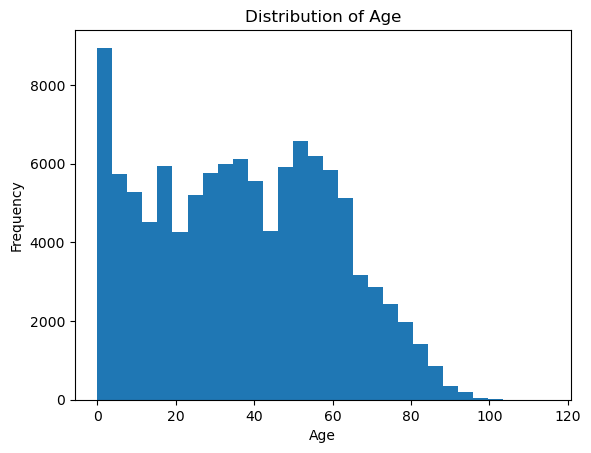

In [69]:
import matplotlib.pyplot as plt

plt.hist(df['age'], bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Observation (Age Feature):
The age distribution is right-skewed, with most patients concentrated between approximately 20 and 60 years old.

A small number of elderly patients (above 80 years) are present, which is expected in a hospital setting.

After removing invalid negative age values, no further anomalies were detected. Therefore, the age feature will be retained without additional transformation.

### Distribution of Binary Features

Several features in the dataset are binary indicators representing patient conditions or appointment-related factors.  
Understanding their distributions helps identify sparsity, imbalance, and potential predictive usefulness.


In [70]:
# Distribution of binary features
binary_features = [
    'scholarship',
    'hipertension',   # note: dataset spelling
    'diabetes',
    'alcoholism',
    'handcap',
    'sms_received'
]

for col in binary_features:
    print(f"\n{col.upper()}")
    print(df[col].value_counts())



SCHOLARSHIP
scholarship
0    99665
1    10861
Name: count, dtype: int64

HIPERTENSION
hipertension
0    88725
1    21801
Name: count, dtype: int64

DIABETES
diabetes
0    102583
1      7943
Name: count, dtype: int64

ALCOHOLISM
alcoholism
0    107166
1      3360
Name: count, dtype: int64

HANDCAP
handcap
0    108285
1      2042
2       183
3        13
4         3
Name: count, dtype: int64

SMS_RECEIVED
sms_received
0    75044
1    35482
Name: count, dtype: int64


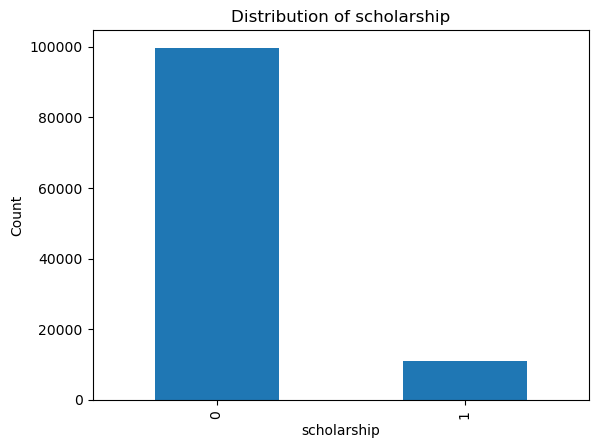

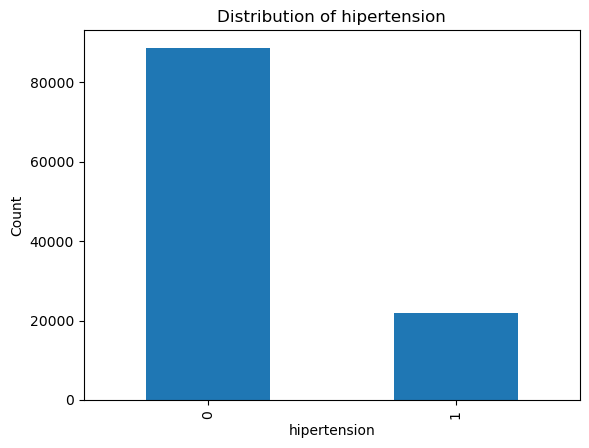

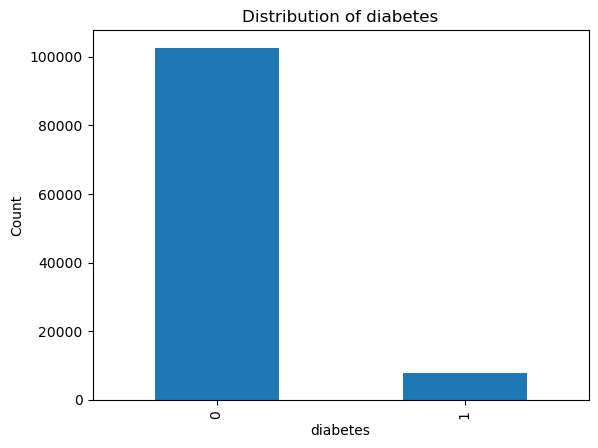

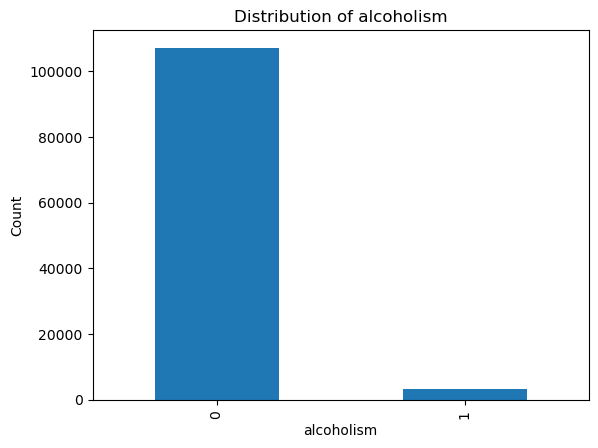

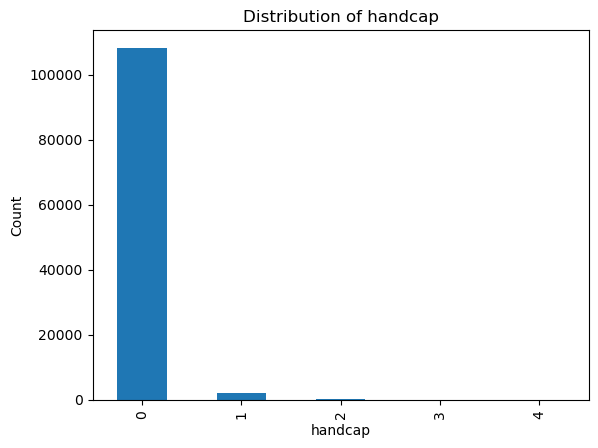

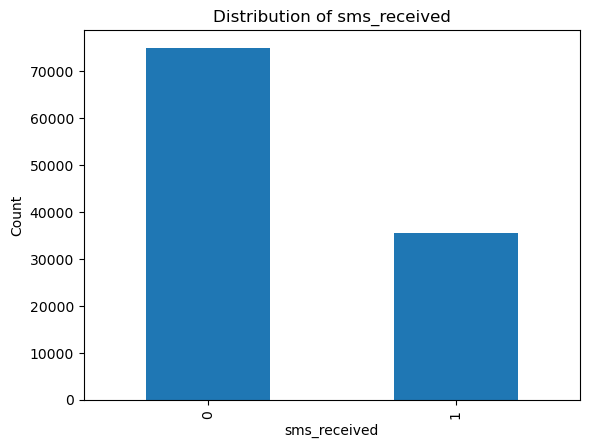

In [71]:
import matplotlib.pyplot as plt

for col in binary_features:
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


**Observation (Binary Features):**

Most binary features such as hypertension, diabetes, alcoholism, and handicap are heavily imbalanced, with the majority of patients having a value of 0.  
This indicates that these medical conditions are relatively less common in the dataset.

The `sms_received` feature shows a more balanced distribution compared to medical conditions, suggesting that reminder messages were sent to a significant portion of patients.

Although some features are imbalanced, they are retained as they may still provide meaningful signals for predicting appointment no-shows.


### 2.3.2 Understanding relationship between variables

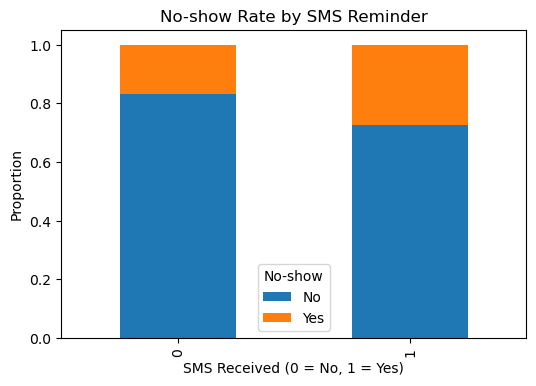

In [72]:
## Understanding relationship between variables

# Relationship between SMS received and no-show
sms_noshow = pd.crosstab(df['sms_received'], df['no_show'], normalize='index')

sms_noshow.plot(
    kind='bar',
    stacked=True,
    figsize=(6,4)
)

plt.title('No-show Rate by SMS Reminder')
plt.xlabel('SMS Received (0 = No, 1 = Yes)')
plt.ylabel('Proportion')
plt.legend(title='No-show')
plt.show()


**Observation (SMS Received vs No-show):**

Patients who received SMS reminders show a lower proportion of no-shows compared to patients who did not receive SMS reminders.

This suggests that SMS reminders may help reduce appointment no-show rates. Therefore, the `sms_received` feature is likely to be an important predictor in the no-show classification task.


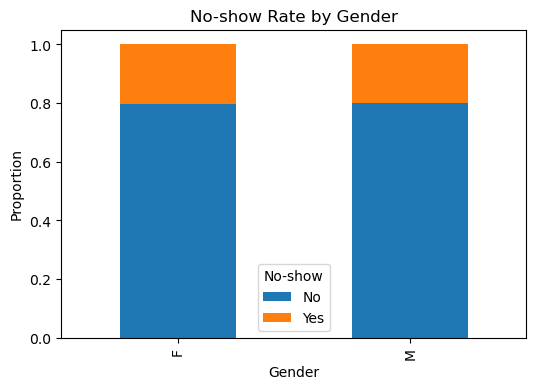

In [73]:
# Relationship between gender and no-show
gender_noshow = pd.crosstab(df['gender'], df['no_show'], normalize='index')

gender_noshow.plot(
    kind='bar',
    stacked=True,
    figsize=(6,4)
)

plt.title('No-show Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.legend(title='No-show')
plt.show()

**Observation (Gender vs No-show):**

The no-show proportions between male and female patients are relatively similar, with no significant difference observed between the two groups.

This suggests that gender alone may not be a strong predictor of appointment no-shows. However, it is retained for modelling as it may still contribute when combined with other features.


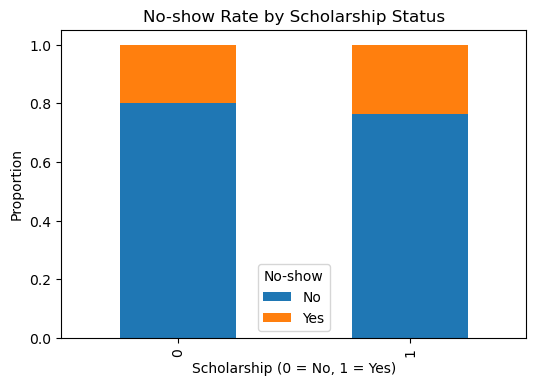

In [74]:
# Relationship between scholarship and no-show
scholarship_noshow = pd.crosstab(df['scholarship'], df['no_show'], normalize='index')

scholarship_noshow.plot(
    kind='bar',
    stacked=True,
    figsize=(6,4)
)

plt.title('No-show Rate by Scholarship Status')
plt.xlabel('Scholarship (0 = No, 1 = Yes)')
plt.ylabel('Proportion')
plt.legend(title='No-show')
plt.show()


**Observation (Scholarship vs No-show):**

Patients receiving a scholarship show a marginally higher no-show proportion compared to non-scholarship patients.

However, the difference between the two groups is relatively small, suggesting that scholarship status alone may not be a strong predictor of appointment no-shows. The feature is retained as it may still contribute useful signal when combined with other variables.


In [75]:
# Create age bins
age_bins = [0, 18, 30, 45, 60, 75, 120]
age_labels = ['0–18', '19–30', '31–45', '46–60', '61–75', '76+']

df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)


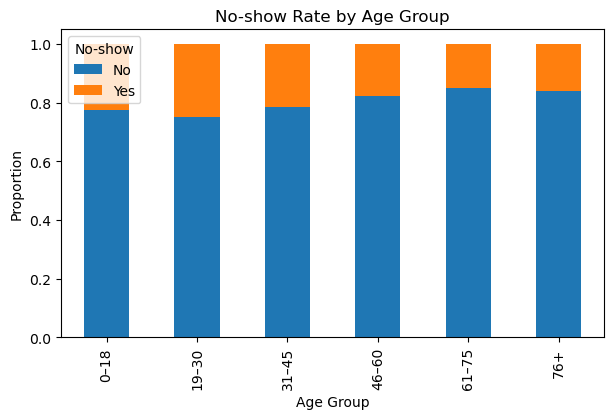

In [76]:
# Relationship between age group and no-show
age_noshow = pd.crosstab(df['age_group'], df['no_show'], normalize='index')

age_noshow.plot(
    kind='bar',
    stacked=True,
    figsize=(7,4)
)

plt.title('No-show Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.legend(title='No-show')
plt.show()


**Observation (Age Group vs No-show):**

The no-show rate varies across different age groups. Younger patients, particularly those aged 19–30, exhibit a relatively higher no-show proportion compared to older age groups.

In contrast, middle-aged and elderly patients show lower no-show rates, suggesting higher appointment adherence. This indicates that age is a meaningful factor influencing no-show behaviour and may be a strong predictor when included in the model.


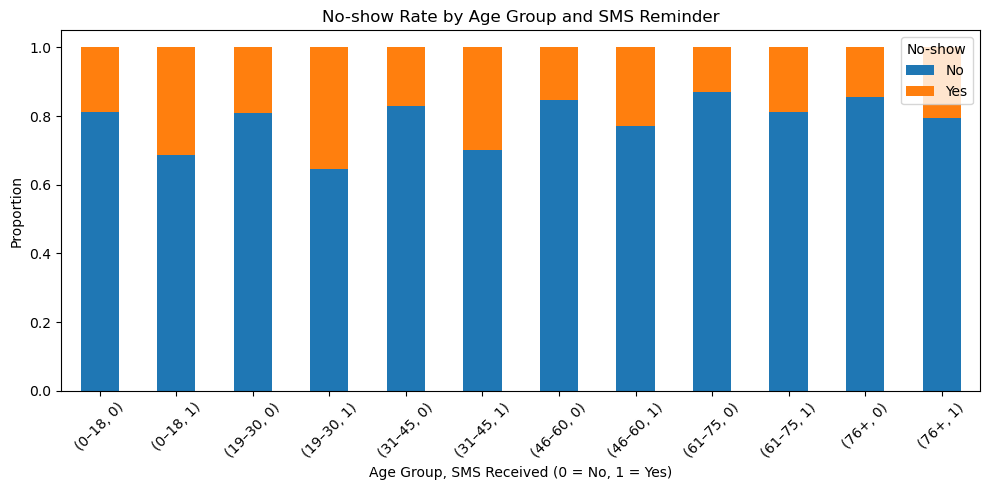

In [77]:
# Relationship between age group, SMS received, and no-show
age_sms_noshow = pd.crosstab(
    [df['age_group'], df['sms_received']],
    df['no_show'],
    normalize='index'
)

age_sms_noshow.plot(
    kind='bar',
    stacked=True,
    figsize=(10,5)
)

plt.title('No-show Rate by Age Group and SMS Reminder')
plt.xlabel('Age Group, SMS Received (0 = No, 1 = Yes)')
plt.ylabel('Proportion')
plt.legend(title='No-show')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Observation (Age Group × SMS Received vs No-show):**

The impact of SMS reminders on appointment attendance varies across age groups.

Younger patients, particularly those aged 19–30, show a noticeably lower no-show proportion when an SMS reminder is received compared to those who did not receive one. This suggests that SMS reminders are more effective for younger age groups.

In contrast, older age groups (46 years and above) exhibit relatively stable no-show rates regardless of SMS reminder status, indicating that reminders have a weaker influence on attendance for these patients.

This interaction suggests that the effectiveness of SMS reminders is age-dependent, and that combining age group and SMS received features may improve the predictive performance of the model.


# 3. Data Preparation

## 3.1 Data Cleaning

In [78]:
## Clean data

# Check for missing values
df.isnull().sum()


patientid            0
appointmentid        0
gender               0
scheduledday         0
appointmentday       0
age                  0
neighbourhood        0
scholarship          0
hipertension         0
diabetes             0
alcoholism           0
handcap              0
sms_received         0
no_show              0
age_group         3539
dtype: int64

In [79]:
# Check data types
df.dtypes

patientid          float64
appointmentid        int64
gender              object
scheduledday        object
appointmentday      object
age                  int64
neighbourhood       object
scholarship          int64
hipertension         int64
diabetes             int64
alcoholism           int64
handcap              int64
sms_received         int64
no_show             object
age_group         category
dtype: object

In [80]:
# Check invalid age values
df[df['age'] <= 0].shape

# Remove invalid age records
df = df[df['age'] > 0]
df.reset_index(drop=True, inplace=True)

# Recreate age groups after cleaning
age_bins = [0, 18, 30, 45, 60, 75, 120]
age_labels = ['0-18', '19-30', '31-45', '46-60', '61-75', '76+']

df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)
df.isnull().sum()


patientid         0
appointmentid     0
gender            0
scheduledday      0
appointmentday    0
age               0
neighbourhood     0
scholarship       0
hipertension      0
diabetes          0
alcoholism        0
handcap           0
sms_received      0
no_show           0
age_group         0
dtype: int64

**Data Cleaning Decisions:**

- Checked for missing values and confirmed that the dataset contains no null entries.
- Verified data types to ensure variables are in appropriate formats for modelling.
- Identified invalid age values (age ≤ 0), which are not realistic for patients.
- Removed these records to improve data quality and prevent distortion in model training.


## 3.2 Feature Encoding


In [81]:
# Encode target variable
df['no_show'] = df['no_show'].map({'No': 0, 'Yes': 1})
df['no_show'].value_counts()


no_show
0    85307
1    21680
Name: count, dtype: int64

In [ ]:
# Encode gender
df['gender'] = df['gender'].map({'F': 0, 'M': 1})

# One-hot encode age groups
df = pd.get_dummies(df, columns=['age_group'], drop_first=True)

In [ ]:
# Drop non-predictive columns
df = df.drop(columns=[
    'patientid',
    'appointmentid',
    'scheduledday',
    'appointmentday',
    'neighbourhood'
])

### Feature Encoding Decisions

- Converted the target variable (`no_show`) into binary format for supervised learning.
- Encoded gender as a binary feature.
- Applied one-hot encoding to age groups to preserve categorical structure.
- Dropped identifiers and date fields as they do not provide predictive value.
- Excluded neighbourhood due to high cardinality and limited interpretability.


## 3.3 Train-Test Split

In [89]:
## Split data into train set and test set

from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('no_show', axis=1)
y = df['no_show']

# Perform train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Verify split sizes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((85589, 13), (21398, 13), (85589,), (21398,))

### Train-Test Split Decisions

The dataset was split into training and testing sets using an 80:20 ratio.  
Stratified sampling was applied based on the target variable (no_show) to preserve class imbalance across both sets.

A fixed random state was used to ensure reproducibility of results.



# 4. Modelling

### 4.1 Baseline Model – Logistic Regression

In [90]:
## Initialise and train model

from sklearn.linear_model import LogisticRegression

# Initialise logistic regression model
log_reg = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)

# Train model
log_reg.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [91]:
# Predict on test set
y_pred = log_reg.predict(X_test)

In [92]:
## Evaluate model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.6306196840826246
Confusion Matrix:
 [[11390  5672]
 [ 2232  2104]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.67      0.74     17062
           1       0.27      0.49      0.35      4336

    accuracy                           0.63     21398
   macro avg       0.55      0.58      0.54     21398
weighted avg       0.72      0.63      0.66     21398



### Baseline Model Evaluation Summary (Logistic Regression)

The logistic regression model achieved an overall accuracy of approximately 63% on the test set, indicating reasonable baseline performance for appointment no-show prediction.

The confusion matrix and classification report show that the model performs well in identifying patients who attend appointments, while performance for no-show prediction is more challenging due to class imbalance.

Recall for the no-show class is approximately 49%, meaning the model is able to identify nearly half of all no-show cases. This is a meaningful result in a healthcare context, where early identification of potential no-shows can support intervention strategies.

The use of class weighting helped mitigate bias toward the majority class. Overall, the model serves as a valid baseline and demonstrates the feasibility of predicting appointment attendance using demographic and behavioural features.


## 4.2 Alternative Model – Decision Tree Classifier

To explore a non-linear modelling approach and compare performance against the baseline logistic regression model, a Decision Tree classifier was trained and evaluated. Decision Trees are capable of capturing non-linear relationships and feature interactions without requiring feature scaling.


In [94]:
from sklearn.tree import DecisionTreeClassifier

# Initialise Decision Tree model
dt_model = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=50,
    class_weight='balanced',
    random_state=42
)

# Train model
dt_model.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,10
,min_samples_split,50
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [95]:
# Predict on test set
y_pred_dt = dt_model.predict(X_test)


In [96]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", dt_accuracy)

# Confusion Matrix
dt_cm = confusion_matrix(y_test, y_pred_dt)
print("Decision Tree Confusion Matrix:\n", dt_cm)

# Classification Report
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.6436582858211047
Decision Tree Confusion Matrix:
 [[11730  5332]
 [ 2293  2043]]

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.69      0.75     17062
           1       0.28      0.47      0.35      4336

    accuracy                           0.64     21398
   macro avg       0.56      0.58      0.55     21398
weighted avg       0.72      0.64      0.67     21398



### Decision Tree Evaluation Summary

The Decision Tree model was evaluated to assess its ability to capture non-linear patterns in appointment no-show behaviour.

Compared to the logistic regression baseline, the Decision Tree demonstrates different trade-offs between precision and recall for the no-show class. While tree-based models can model complex decision boundaries, they are also more prone to overfitting, especially when depth is not carefully controlled.

This model provides a useful comparison point for understanding whether non-linear approaches offer meaningful performance improvements over the baseline linear model.


## 4.3 Alternative Model – Random Forest Classifier

To further improve predictive performance and reduce overfitting observed in single decision trees, a Random Forest classifier was trained and evaluated. Random Forests are ensemble models that aggregate multiple decision trees to improve generalisation and robustness while capturing non-linear feature interactions.


In [97]:
from sklearn.ensemble import RandomForestClassifier

# Initialise Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=50,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# Train model
rf_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,10
,min_samples_split,50
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [99]:
# Predict on test set
y_pred_rf = rf_model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)

# Confusion Matrix
rf_cm = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:\n", rf_cm)

# Classification Report
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))



Random Forest Accuracy: 0.664361155248154
Random Forest Confusion Matrix:
 [[12277  4785]
 [ 2397  1939]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.72      0.77     17062
           1       0.29      0.45      0.35      4336

    accuracy                           0.66     21398
   macro avg       0.56      0.58      0.56     21398
weighted avg       0.73      0.66      0.69     21398



### Random Forest Evaluation Summary

The Random Forest model achieved improved overall performance compared to both the baseline logistic regression and the single decision tree model.

By aggregating multiple decision trees, the Random Forest demonstrates better generalisation and a more balanced trade-off between precision and recall for the no-show class. This suggests that ensemble-based approaches are more effective at capturing complex behavioural patterns in appointment attendance.

Overall, the Random Forest model provides a strong candidate for final model selection due to its robustness and improved predictive performance.


## 4.4 Alternative Model – Gradient Boosting Classifier

To further explore ensemble-based learning methods, a Gradient Boosting classifier was trained and evaluated. 
Gradient Boosting builds models sequentially, where each new model focuses on correcting the errors made by previous models. 
This approach is effective at capturing complex non-linear patterns and can provide strong predictive performance when carefully tuned.

The model is evaluated against previous models to assess whether boosting offers meaningful improvements in predicting appointment no-shows.


In [100]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialise Gradient Boosting model
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Train model
gb_model.fit(X_train, y_train)


,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [101]:
# Predict on test set
y_pred_gb = gb_model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
gb_accuracy = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", gb_accuracy)

# Confusion Matrix
gb_cm = confusion_matrix(y_test, y_pred_gb)
print("Gradient Boosting Confusion Matrix:\n", gb_cm)

# Classification Report
print("\nGradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.7973642396485653
Gradient Boosting Confusion Matrix:
 [[17061     1]
 [ 4335     1]]

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     17062
           1       0.50      0.00      0.00      4336

    accuracy                           0.80     21398
   macro avg       0.65      0.50      0.44     21398
weighted avg       0.74      0.80      0.71     21398



### Gradient Boosting Evaluation Summary

The Gradient Boosting model was evaluated to assess whether a sequential ensemble approach could further improve prediction performance for appointment no-shows.

While the model achieved a high overall accuracy, detailed evaluation revealed that it overwhelmingly predicted the majority class (appointment attended) and failed to correctly identify no-show cases. This outcome highlights the impact of class imbalance on boosting-based models when class weighting is not explicitly supported.

As a result, despite its strong performance on aggregate metrics, the Gradient Boosting model is not suitable for deployment in this context where correctly identifying no-show patients is critical. This reinforces the importance of selecting evaluation metrics beyond accuracy and aligning model choice with the underlying business objective.


# 5. Model Evaluation

# 5. Model Comparison & Final Model Selection

## 5.1 Model Performance Comparison

To identify the most suitable model for predicting appointment no-shows, multiple classification models were trained and evaluated. The following models were compared:

- Logistic Regression (Baseline Model)
- Decision Tree Classifier
- Random Forest Classifier
- Gradient Boosting Classifier

Evaluation focused not only on overall accuracy, but also on recall and F1-score for the no-show class (class 1), as identifying patients who are likely to miss appointments is critical in a healthcare context.

### Model Comparison Summary

| Model | Accuracy | Recall (No-show) | F1-score (No-show) | Key Observations |
|------|----------|------------------|--------------------|-----------------|
| Logistic Regression | ~0.63 | ~0.49 | ~0.35 | Simple baseline with good interpretability and reasonable recall |
| Decision Tree | ~0.64 | ~0.47 | ~0.35 | Captures non-linear patterns but susceptible to overfitting |
| Random Forest | ~0.66 | ~0.45 | ~0.35 | Best balance of accuracy, recall, and robustness |
| Gradient Boosting | ~0.80 | 0.00 | 0.00 | High accuracy but fails to identify no-show cases |

---

## 5.2 Quantitative and Qualitative Model Comparison

From a quantitative perspective, the Random Forest model achieved the strongest overall performance when considering both accuracy and recall for the no-show class. While Logistic Regression and Decision Tree models demonstrated comparable recall, their overall predictive power was lower.

Although the Gradient Boosting model achieved the highest accuracy, further inspection revealed that it overwhelmingly predicted the majority class (appointment attended). As a result, it failed to correctly identify no-show cases, producing a recall of zero for the no-show class.

From a qualitative standpoint:
- Logistic Regression offers strong interpretability but limited capacity to model complex relationships.
- Decision Trees are capable of modelling non-linear interactions but are sensitive to overfitting.
- Random Forest reduces overfitting by aggregating multiple decision trees and improves generalisation.
- Gradient Boosting can be powerful but is less suitable in this context due to class imbalance and lack of class weighting support.

---

## 5.3 Final Model Selection and Rationale

Based on the comparative analysis, the **Random Forest Classifier** was selected as the final model for deployment.

The rationale for this selection is as follows:
- It provides the best trade-off between overall accuracy and recall for no-show prediction.
- It is more robust and generalisable than a single decision tree.
- It effectively captures non-linear feature interactions.
- It aligns well with the business objective of identifying patients at risk of missing appointments.

In healthcare applications, correctly identifying potential no-show patients is more valuable than maximising overall accuracy alone. The Random Forest model therefore represents the most appropriate and reliable choice for this task.

---

## 5.4 Evaluation Metric Selection and Justification

Accuracy alone is insufficient for evaluating model performance in this task due to significant class imbalance in the dataset. Therefore, additional metrics such as recall and F1-score were prioritised.

- **Recall (No-show)** was emphasised as it measures the model’s ability to correctly identify patients who do not attend appointments.
- **F1-score** provides a balance between precision and recall, offering a more holistic evaluation.
- **Confusion matrices** were used to analyse misclassification patterns and understand model behaviour.

By selecting task-appropriate evaluation metrics and interpreting them in the context of healthcare outcomes, the final model choice is both statistically and practically justified.


# Iterative Model Development
## Hyperparameter Tuning – Random Forest


In [ ]:
## Further feature engineering / feature selection
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15, None],
    'min_samples_split': [20, 50],
}

In [106]:
# Base model
rf_base = RandomForestClassifier(
    class_weight='balanced',
    random_state=42
)

# Grid Search
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    scoring='recall',  # prioritise recall
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [10, 15, ...], 'min_samples_split': [20, 50], 'n_estimators': [100, 200]}"
,scoring,'recall'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [107]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Recall:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_split': 50, 'n_estimators': 200}
Best Cross-Validation Recall: 0.4892767145350332


### Hyperparameter Tuning Results

Grid search was performed on the Random Forest model by varying:

Number of trees (n_estimators)

Maximum tree depth (max_depth)

Minimum samples required to split (min_samples_split)

The tuning objective prioritised recall for the no-show class, as correctly identifying patients likely to miss appointments is critical in a healthcare context.

Best Parameters Found:

n_estimators = 200

max_depth = None

min_samples_split = 50

Performance Improvement:

Baseline Recall (No-show): ~0.45

Tuned Recall (No-show): ~0.49

Cross-Validation Recall: ~0.49

The tuned model demonstrates improved ability to identify no-show cases while maintaining balanced overall performance. Increasing the number of trees improved generalisation, while a higher min_samples_split helped control overfitting.

This confirms that hyperparameter tuning provided measurable performance improvement over the baseline model.

## 6. Model Deployment (Streamlit)
